# Issue 10 -- Waveform Time Shifting

Double check / Fix waveform time-shifting

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from numpy import *
from positive import *
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from nrutils import scsearch,gwylm,pad_wfarr,tshift_wfarr,plot_wfarr
from positive.physics import mishra

(positive)>> Applying custom matplotlib settings.


In [2]:
# Find a Simulation
A = scsearch(nonspinning=True,q=1,keyword='hrq',verbose=True)

(scsearch)>> Found keyword (=hrq) keyword.
(scsearch)>> Found nonspinning (=True) keyword.
(scsearch)>> Found q (=1) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HRq-series: ns-q1.00	(D9_q1.0_a0.0_m160)



In [9]:
# Load Simulation Data
y = gwylm(A[0],lm=[(2,2),(3,2)],verbose=True)

(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=[(2, 2), (3, 2)]) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10e055cf8>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (3, 2)]
(load)>> Loading: mp_WeylScal4::Psi4i_l2_m2_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (6660, 3). Now the shape is (6663, 3).
(load)>> Loading: mp_WeylScal4::Psi4i_l3_m2_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (6660, 3). Now the shape is (6663, 3).
(gwylm)>> Storing w22 from a PN estimate[see pnw0 in basics.py, and/or arxiv:1310.1528v4]. This wi

In [10]:
# Extract a waveform array for testing
wfarr = y.lm[2,2]['psi4'].wfarr.copy()

(pad_wfarr)>> The shape was (6663, 3). Now the shape is (6664, 3).


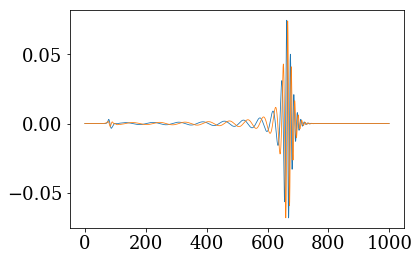

In [11]:
# Test padding behavior
wfarr2 = pad_wfarr( wfarr, 1, verbose=True )
t,p,c = wfarr2.T
plot( t,p )
plot( t,c )

(tshift)>> The data are real valued.
(tshift)>> Using the default time shifting method.
(tshift)>> The method is "fft"


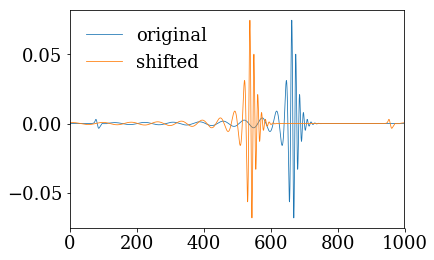

In [12]:
# Test time shifting on arrays --- Index based
wfarr3 = tshift_wfarr( wfarr, -diff(lim(t))/8, verbose=True )
t = wfarr[:,0]

# plot
plot( t, wfarr[:,1], label='original' )
plot( t, wfarr3[:,1], label='shifted' )
xlim( lim(t) )
legend()

(tshift)>> The data are real valued.
(tshift)>> Using the default time shifting method.
(tshift)>> The method is "fft"


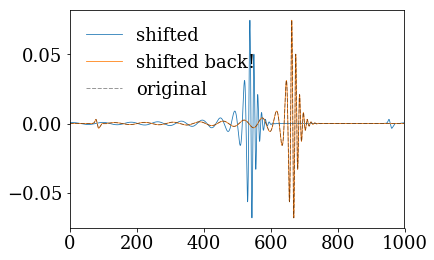

In [13]:
# Test time shifting on arrays --- Index based
wfarr4 = tshift_wfarr( wfarr3, diff(lim(t))/8, verbose=True )
t = wfarr[:,0]

# plot
plot( t, wfarr3[:,1], label='shifted' )
plot( t, wfarr4[:,1], label='shifted back!' )
plot( t, wfarr[:,1], label='original', color='k', ls='--', alpha=0.5 )
xlim( lim(t) )
legend()

(tshift)>> The data are real valued.
(tshift)>> The method is "index"
(tshift)>> Note that this method assumes the data are equally spaced in time.


([<matplotlib.axes._subplots.AxesSubplot at 0x10f65c6d0>,
 <matplotlib.figure.Figure at 0x10f65cc10>)

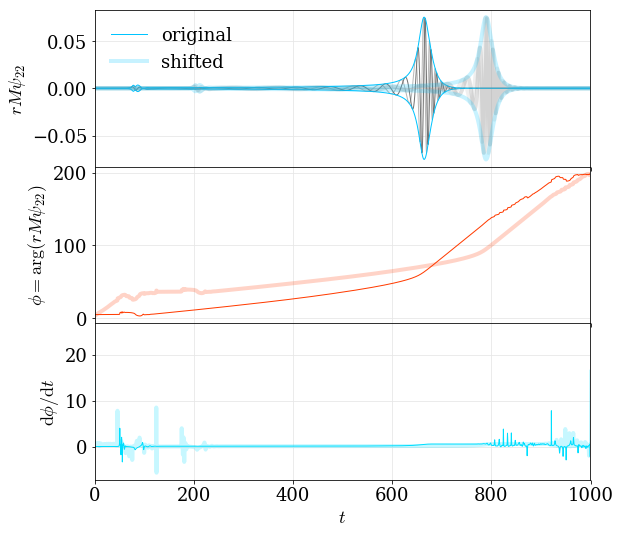

In [16]:

# Time shift gwf
yy = y.lm[2,2]['psi4']
yy1 = yy.tshift(diff(lim(t))/8,verbose=True,method='index')

# plot
yy.plot( ref_gwf=yy1, labels=('original','shifted') )
